In [ ]:
import pandas as pd

In [ ]:
def missing(df):
    """
    Calculate the missing values and percentage of each column while preserving the column's data type
    """
    # Sum the missing values in each column and sort them in descending order.
    missing_number = df.isnull().sum().sort_values(ascending=False)
    # Percentage of missing values per column
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    # The data type of each column
    dtypes = df.dtypes
    # Merge into a DataFrame
    missing_values = pd.concat([missing_number, missing_percent, dtypes], axis=1, keys=['Missing_Number', 'Missing_Percent', 'Data_Type'])
    return missing_values[missing_values['Missing_Percent'] > 0]

In [ ]:
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customerid_data = pd.read_csv('Customer_ID.csv')
transactionid_data = pd.read_csv('Transaction_ID.csv')


In [ ]:
#Calculate each dataset missing value and percentage
missing(cab_data)

,Missing_Number,Missing_Percent,Data_Type


In [ ]:
missing(city_data)

,Missing_Number,Missing_Percent,Data_Type


In [ ]:
missing(customerid_data)

,Missing_Number,Missing_Percent,Data_Type


In [ ]:
missing(transactionid_data)

,Missing_Number,Missing_Percent,Data_Type


In [ ]:
# Merge dataframes into final cab data
merged_df1 = pd.merge(cab_data, city_data, on='City')
merged_df2 = pd.merge(merged_df1, transactionid_data, on='Transaction ID')
final_data = pd.merge(merged_df2, customerid_data, on='Customer ID')

In [ ]:
# Remove duplicates
final_data = final_data.drop_duplicates()

In [ ]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Population          359392 non-null  object 
 8   Users               359392 non-null  object 
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 38.4+ MB
None


In [ ]:
# Distinguish between continuous data, ordered categorical data, unordered categorical data (binary variables, multicategorical variables)
numeric_columns = ['KM Travelled','Price Charged','Cost of Trip','Population,','Users','Income (USD/Month)']
ordinal_categorical = ['Date of Travel','Age']
binary_categorical = ['Company','Payment_Mode','Gender']
multiclass_categorical = ['Transaction ID','City','Customer ID']

# Data Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Consumer demographics of different brands

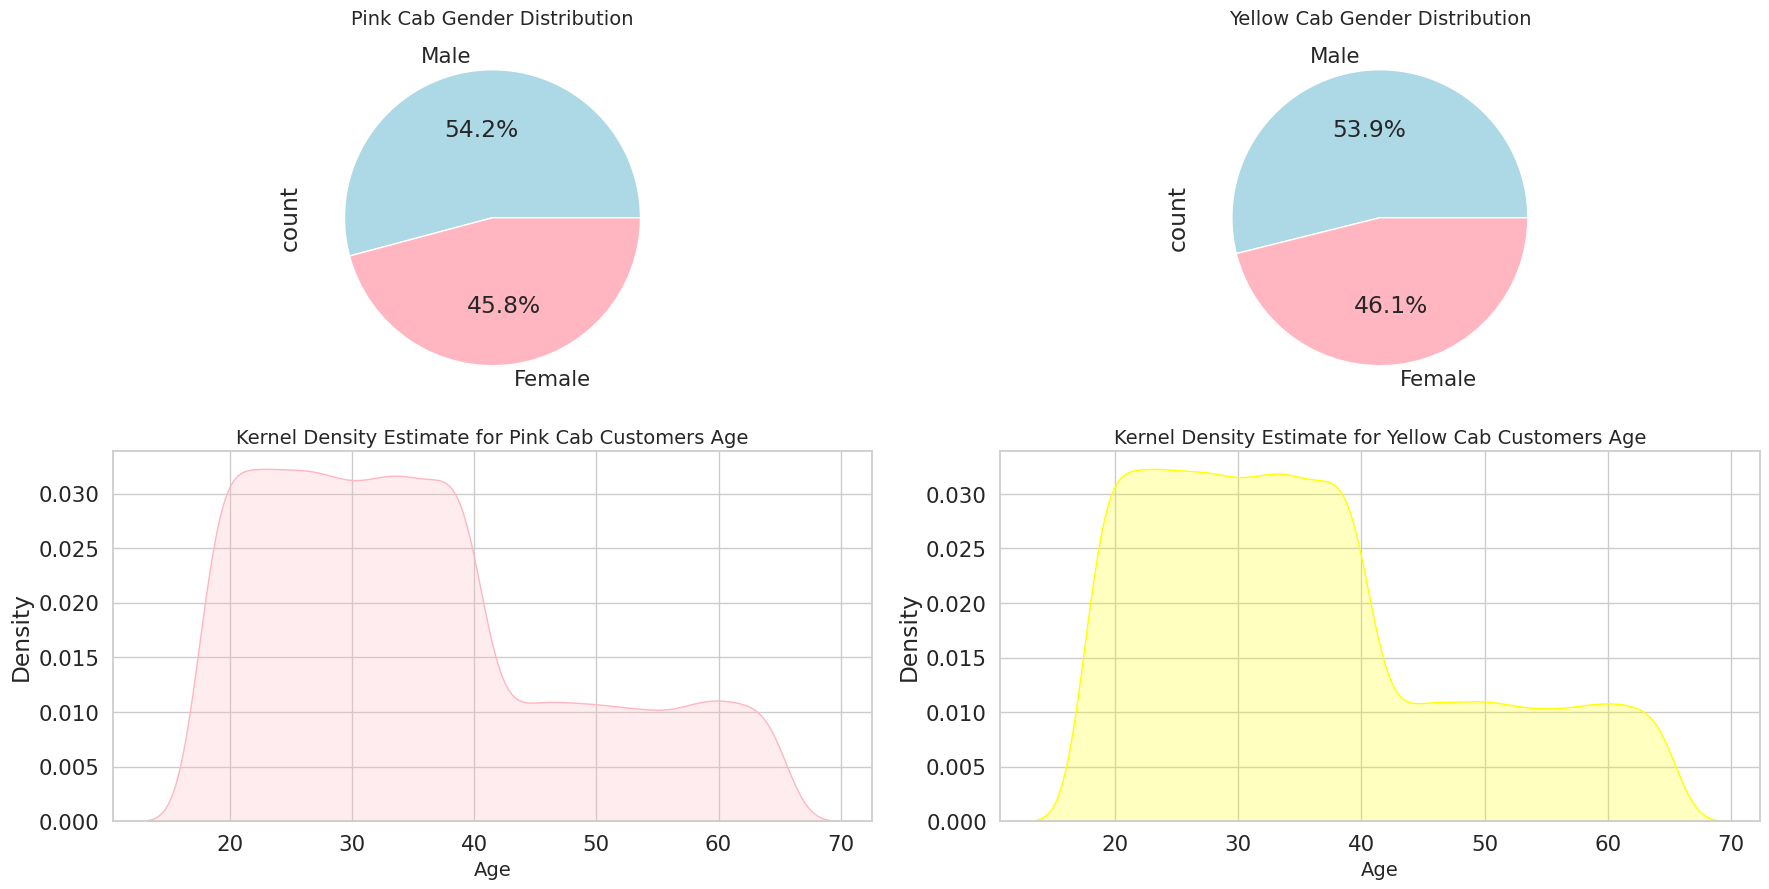

In [ ]:
# Set the graphic style and set the font size
sns.set(style="whitegrid", font_scale=1.4)

# Create a large graphic
plt.figure(figsize=(18, 10))

# Filter data for each company
pink_cab = final_data[final_data['Company'] == 'Pink Cab']
yellow_cab = final_data[final_data['Company'] == 'Yellow Cab']

# Remove duplicate users to ensure unique users
pink_unique_users = pink_cab.drop_duplicates(subset='Customer ID')
yellow_unique_users = yellow_cab.drop_duplicates(subset='Customer ID')

# pie chart ('Gender')
plt.subplot(2, 2, 1)
pink_unique_users['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Pink Cab Gender Distribution', fontsize=14)

plt.subplot(2, 2, 2)
yellow_unique_users['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Yellow Cab Gender Distribution', fontsize=14)

# Kernel density estimation ('Age')
plt.subplot(2, 2, 3)
sns.kdeplot(pink_unique_users['Age'], fill=True, color='lightpink')
plt.title('Kernel Density Estimate for Pink Cab Customers Age', fontsize=14)
plt.xlabel('Age', fontsize=14)

plt.subplot(2, 2, 4)
sns.kdeplot(yellow_unique_users['Age'], fill=True, color='yellow')
plt.title('Kernel Density Estimate for Yellow Cab Customers Age', fontsize=14)
plt.xlabel('Age', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Text(0.5, 1.0, 'Yellow Cab User Income (USD/Month)')

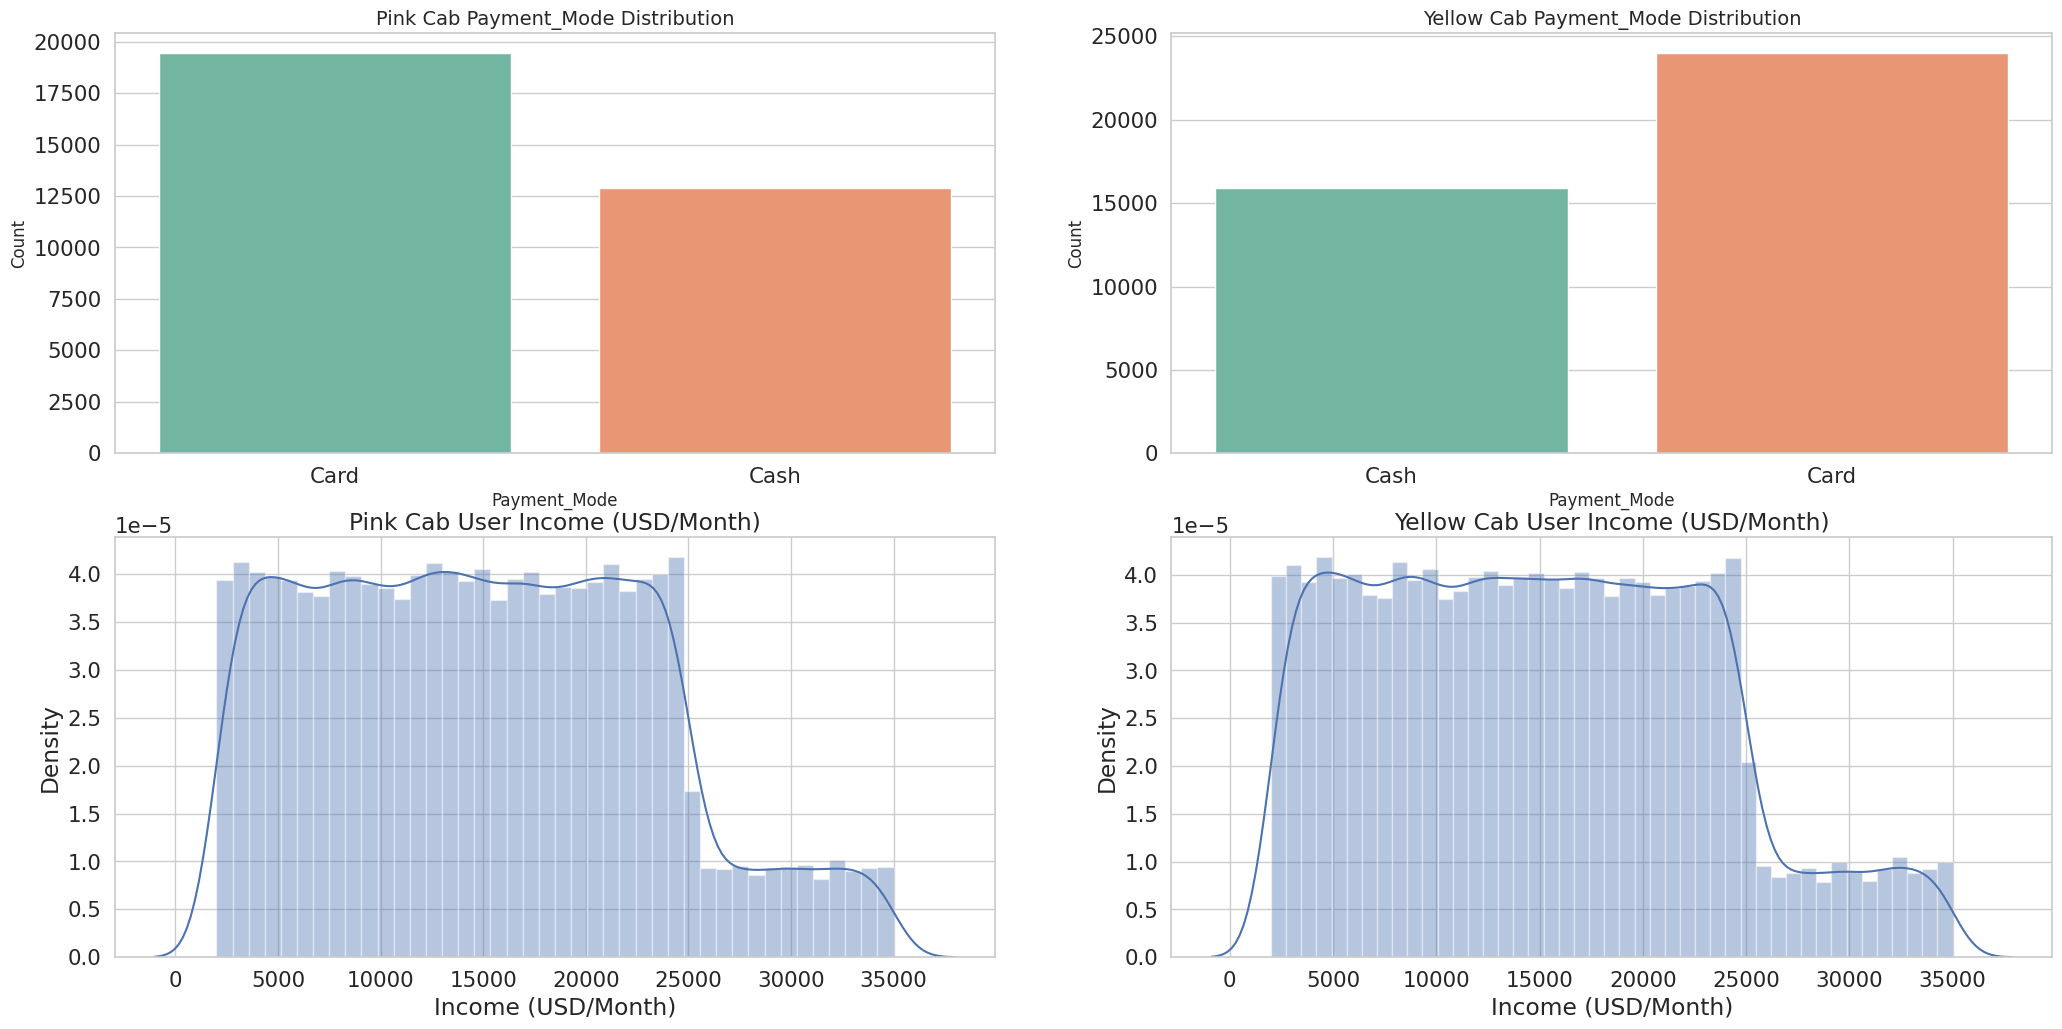

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set the graphic style and set the font size
sns.set(style="whitegrid", font_scale=1.4)

# Create a large graphic
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 12))

#bar chart payment mode
sns.countplot(x='Payment_Mode', data=pink_unique_users, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Pink Cab Payment_Mode Distribution', fontsize=14)
axes[0, 0].set_xlabel('Payment_Mode', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

sns.countplot(x='Payment_Mode', data=yellow_unique_users, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Yellow Cab Payment_Mode Distribution', fontsize=14)
axes[0, 1].set_xlabel('Payment_Mode', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

#Income distribution
sns.distplot(pink_unique_users['Income (USD/Month)'], ax=axes[1, 0])
axes[1, 0].set_title('Pink Cab User Income (USD/Month)')

sns.distplot(yellow_unique_users['Income (USD/Month)'], ax=axes[1, 1])
axes[1, 1].set_title('Yellow Cab User Income (USD/Month)')


## Company Situation Exploration

Text(0.5, 1.0, 'Yellow Cab Cost of Trip')

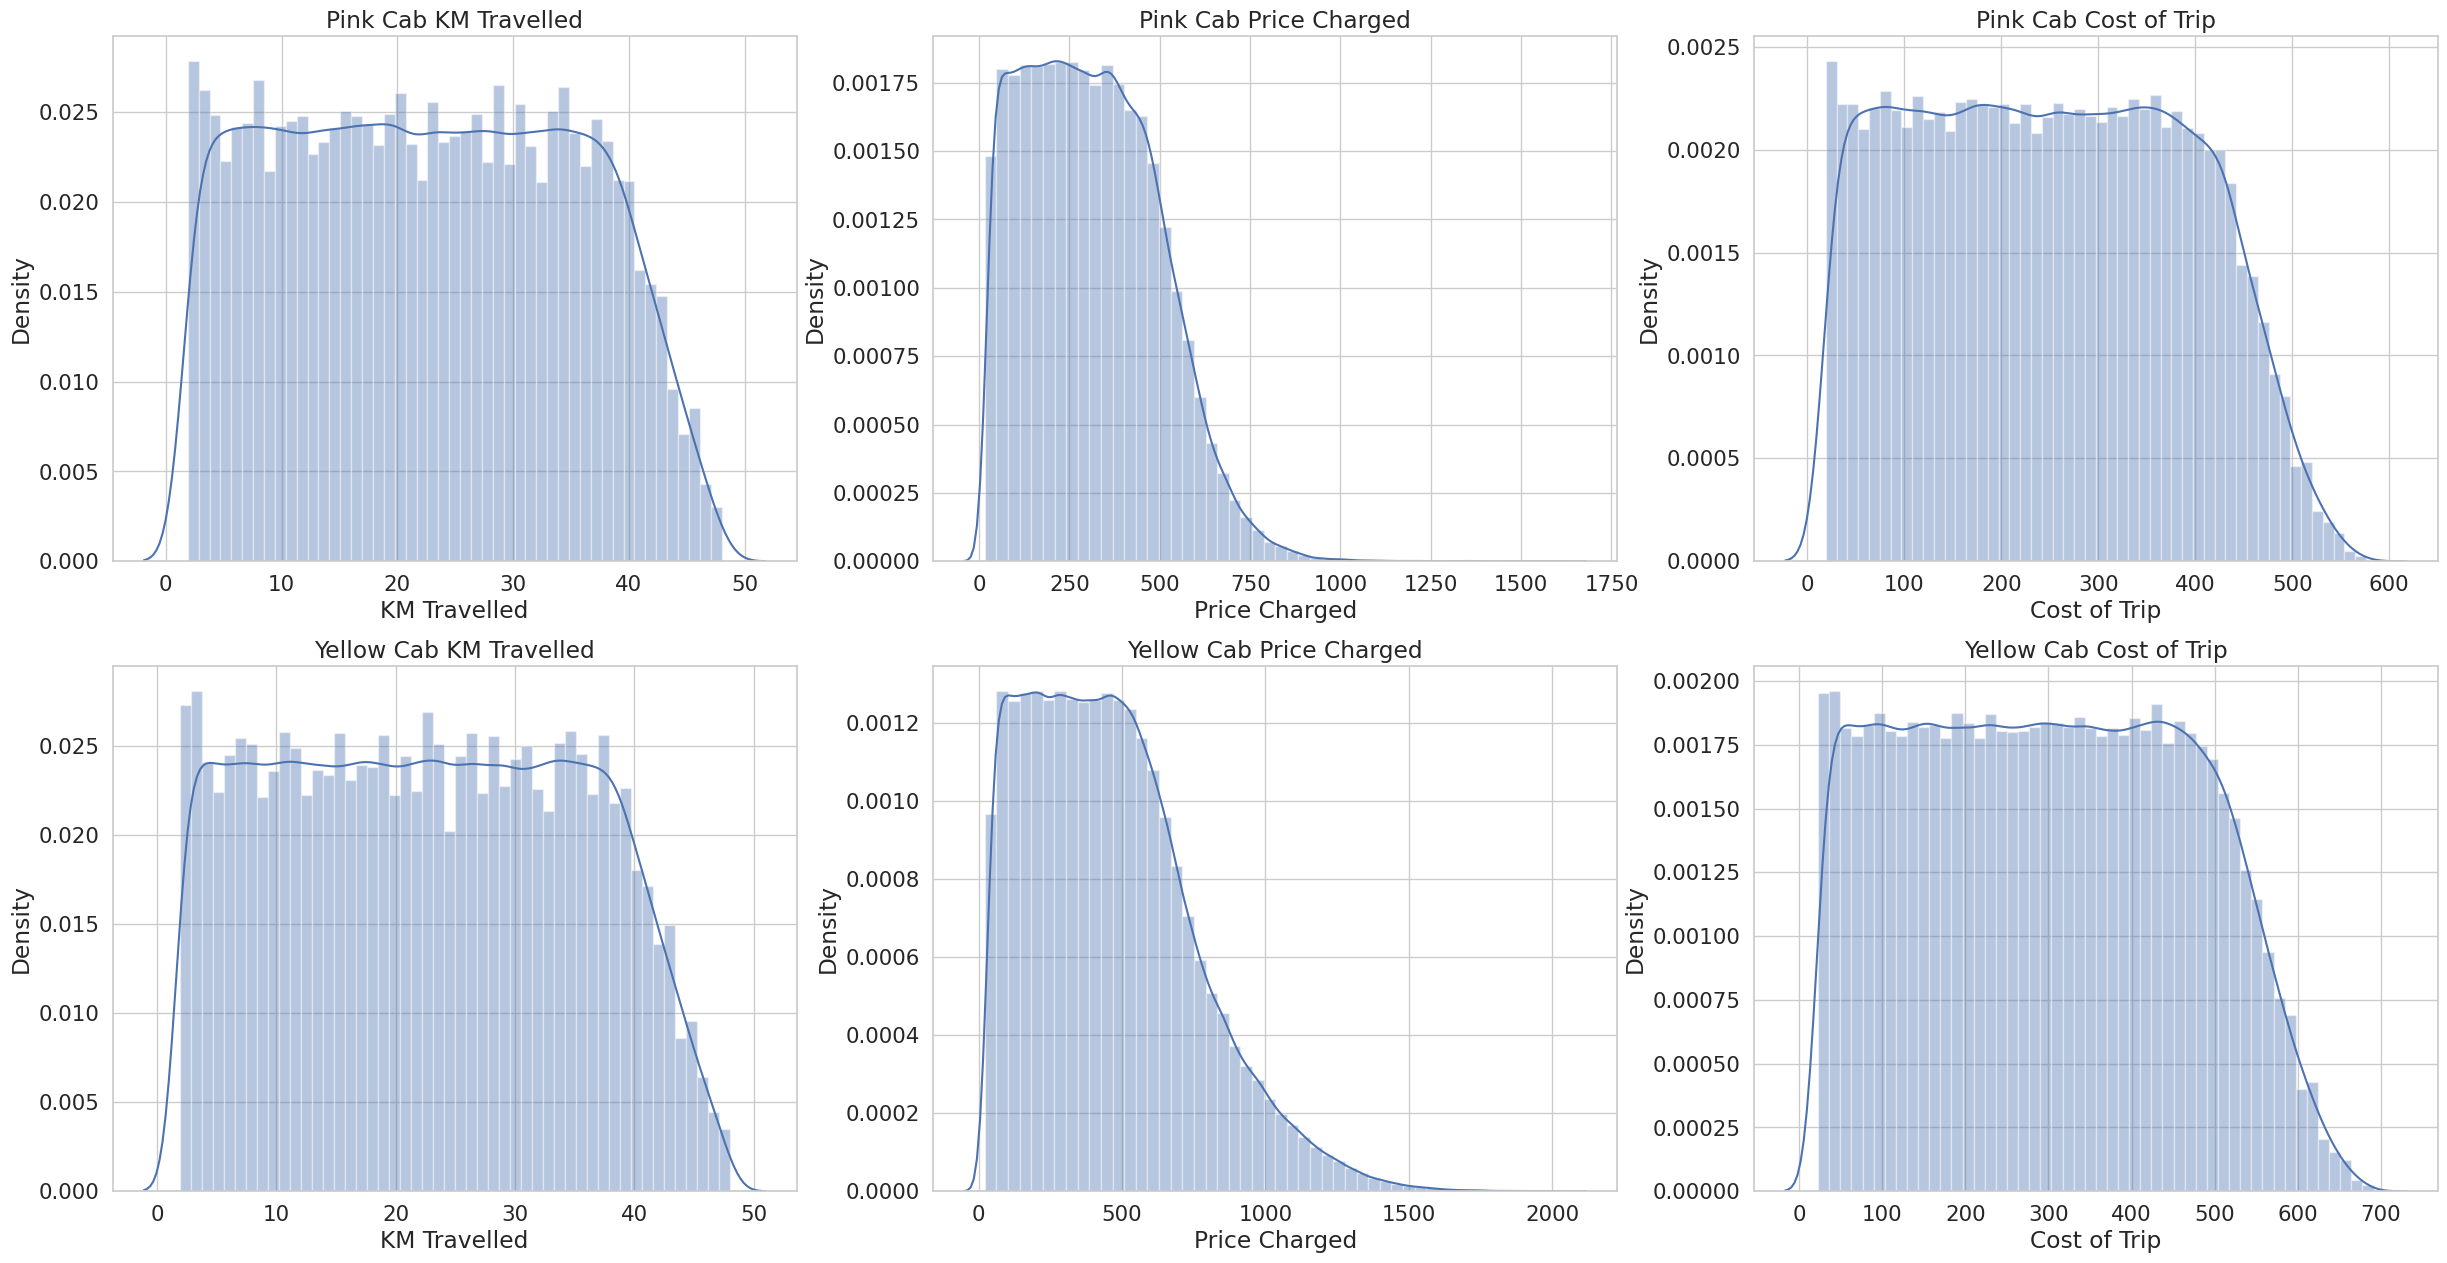

In [ ]:
# Set the graphic style and set the font size
sns.set(style="whitegrid", font_scale=1.4)

# Create a large graphic
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

#KM Travelled distribution
sns.distplot(pink_cab['KM Travelled'], ax=axes[0, 0])
axes[0, 0].set_title('Pink Cab KM Travelled')

sns.distplot(yellow_cab['KM Travelled'], ax=axes[1, 0])
axes[1, 0].set_title('Yellow Cab KM Travelled')

#Price Charged distribution
sns.distplot(pink_cab['Price Charged'], ax=axes[0, 1])
axes[0, 1].set_title('Pink Cab Price Charged')

sns.distplot(yellow_cab['Price Charged'], ax=axes[1, 1])
axes[1, 1].set_title('Yellow Cab Price Charged')

#Cost of Trip distribution
sns.distplot(pink_cab['Cost of Trip'], ax=axes[0, 2])
axes[0, 2].set_title('Pink Cab Cost of Trip')

sns.distplot(yellow_cab['Cost of Trip'], ax=axes[1, 2])
axes[1, 2].set_title('Yellow Cab Cost of Trip')

## Company User and City Coverage


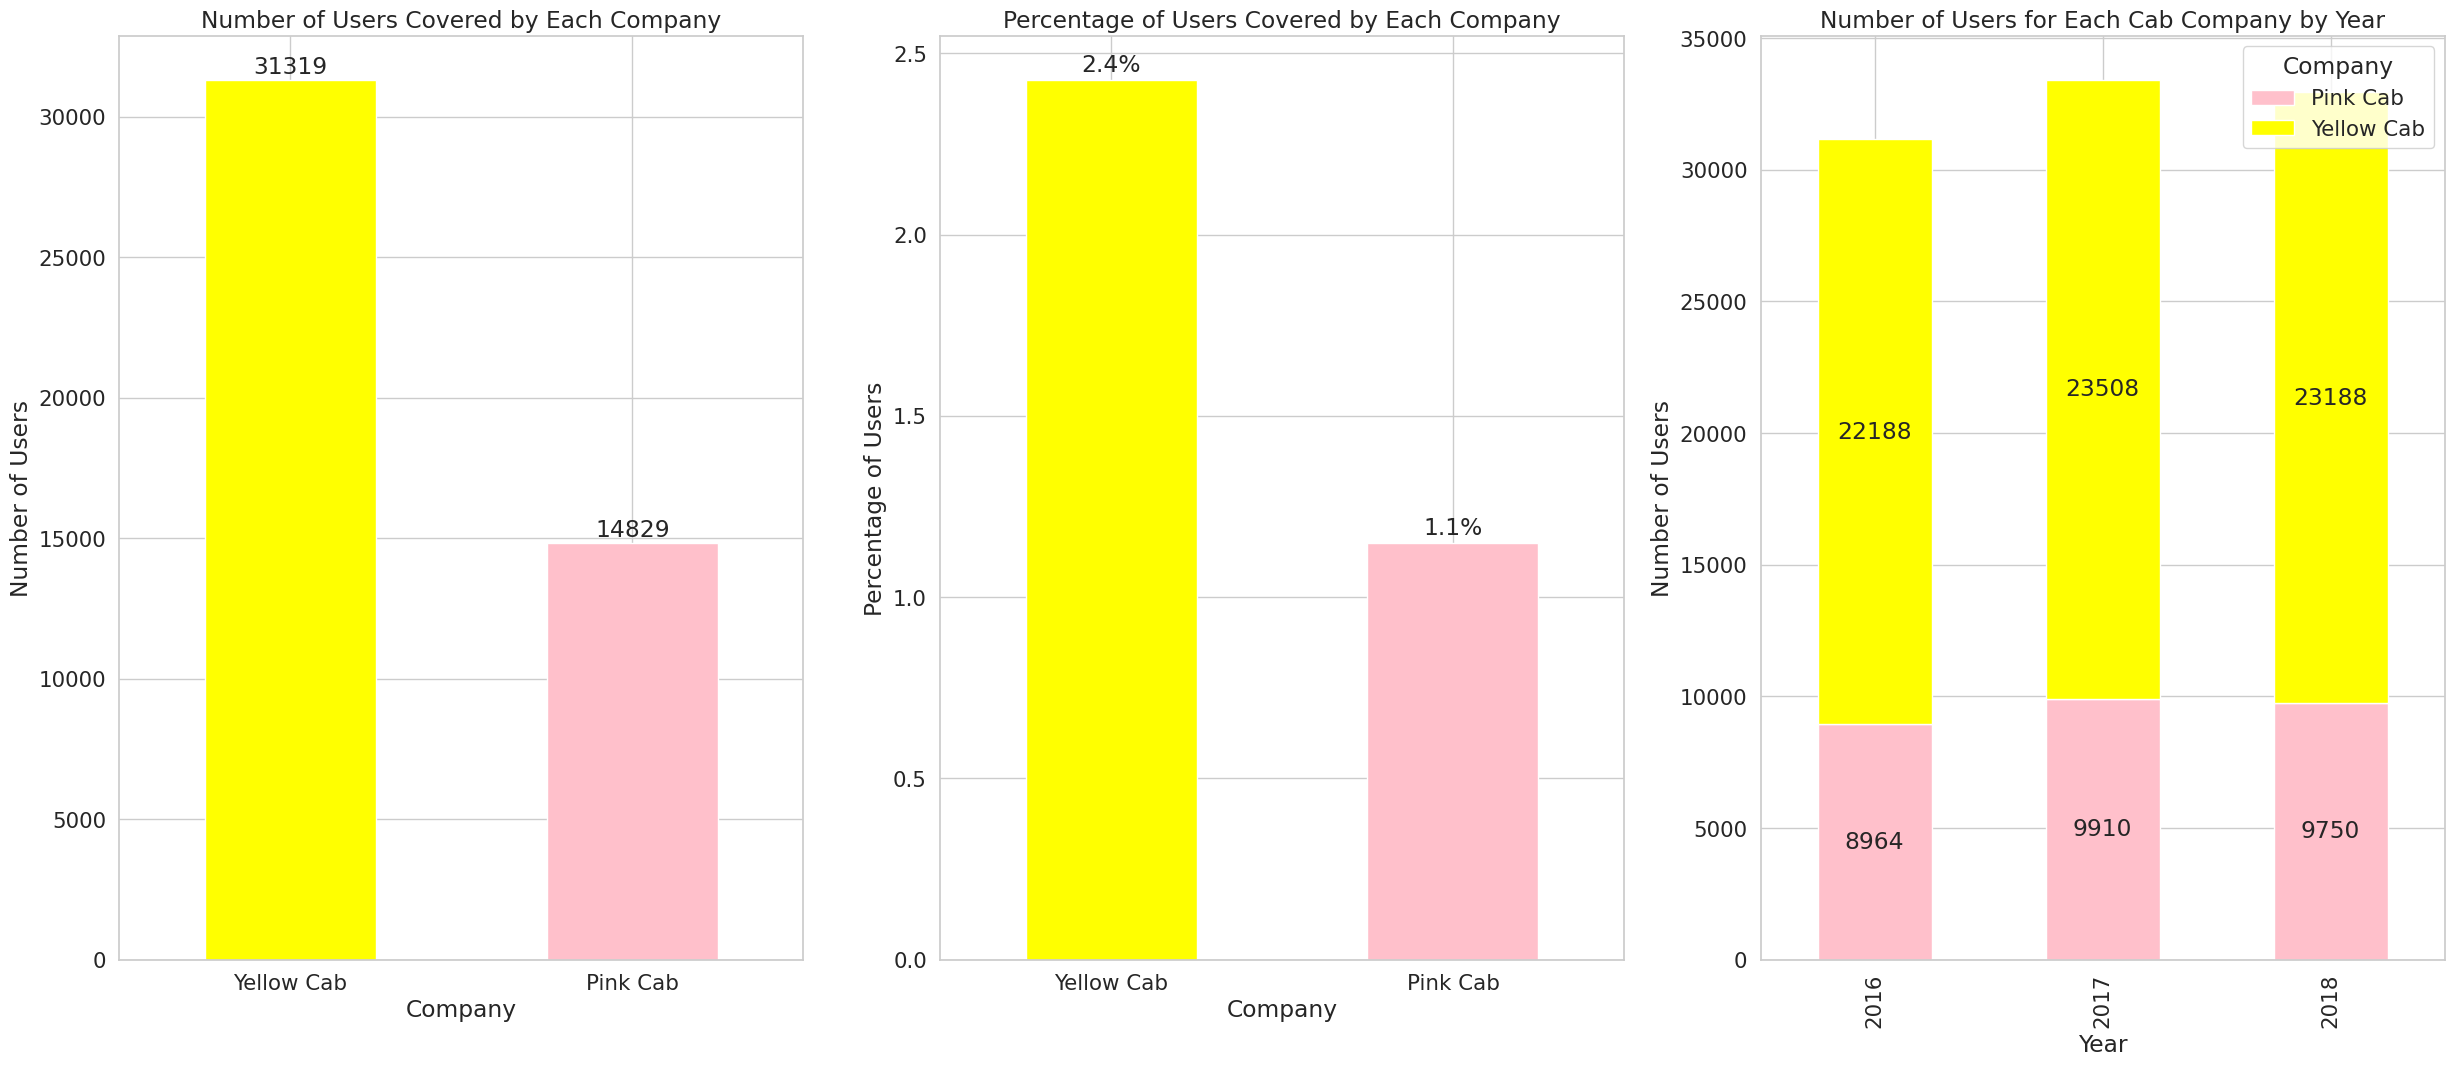

In [ ]:
# Remove duplicate users to ensure unique users
unique_users = final_data.drop_duplicates(subset='Customer ID')

# Count the number of unique users for each company
user_counts = unique_users['Company'].value_counts()

# Calculate the total number of cab users
city_users = city_data['Users'].str.replace(',', '').astype(float)
total_users = city_users.sum()

# Calculate the percentage of users for each company
user_percentage = (user_counts / total_users) * 100

# Convert Date of Travel to datetime and extract year
final_data['Date of Travel'] = pd.to_datetime(final_data['Date of Travel'], format='%Y/%m/%d')
final_data['Year'] = final_data['Date of Travel'].dt.year

# Remove duplicate users per year to ensure unique users per year
uniqueperyear_users = final_data.drop_duplicates(subset=['Customer ID', 'Year'])

# Group by year and company and count unique users
user_counts_by_year = uniqueperyear_users.groupby(['Year', 'Company'])['Customer ID'].nunique().unstack().fillna(0)

# Plot the number of unique users
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 12))

user_counts.plot(kind='bar', color=['yellow', 'pink'], ax=axes[0])
axes[0].set_title('Number of Users Covered by Each Company')
axes[0].set_xlabel('Company')
axes[0].set_ylabel('Number of Users')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
for i in range(len(user_counts)):
    axes[0].text(i, user_counts[i] + 50, str(user_counts[i]), ha='center', va='bottom')

# Plot the percentage of users covered by each company compared to the entire user
user_percentage.plot(kind='bar', color=['yellow', 'pink'], ax=axes[1])
axes[1].set_title('Percentage of Users Covered by Each Company')
axes[1].set_xlabel('Company')
axes[1].set_ylabel('Percentage of Users')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
for i in range(len(user_percentage)):
    axes[1].text(i, user_percentage[i] + 0.01, f'{user_percentage[i]:.1f}%', ha='center', va='bottom')

# Plot the stacked bar chart for user covered by each company each year
user_counts_by_year.plot(kind='bar', stacked=True, color=['pink', 'yellow'], ax=axes[2])
axes[2].set_title('Number of Users for Each Cab Company by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Users')
axes[2].legend(title='Company')
# Annotate each stacked bar with the count value
for bar in axes[2].patches:
    height = bar.get_height()
    if height > 0:
        axes[2].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{int(height)}', ha='center', va='center')


#plt.tight_layout()
plt.show()


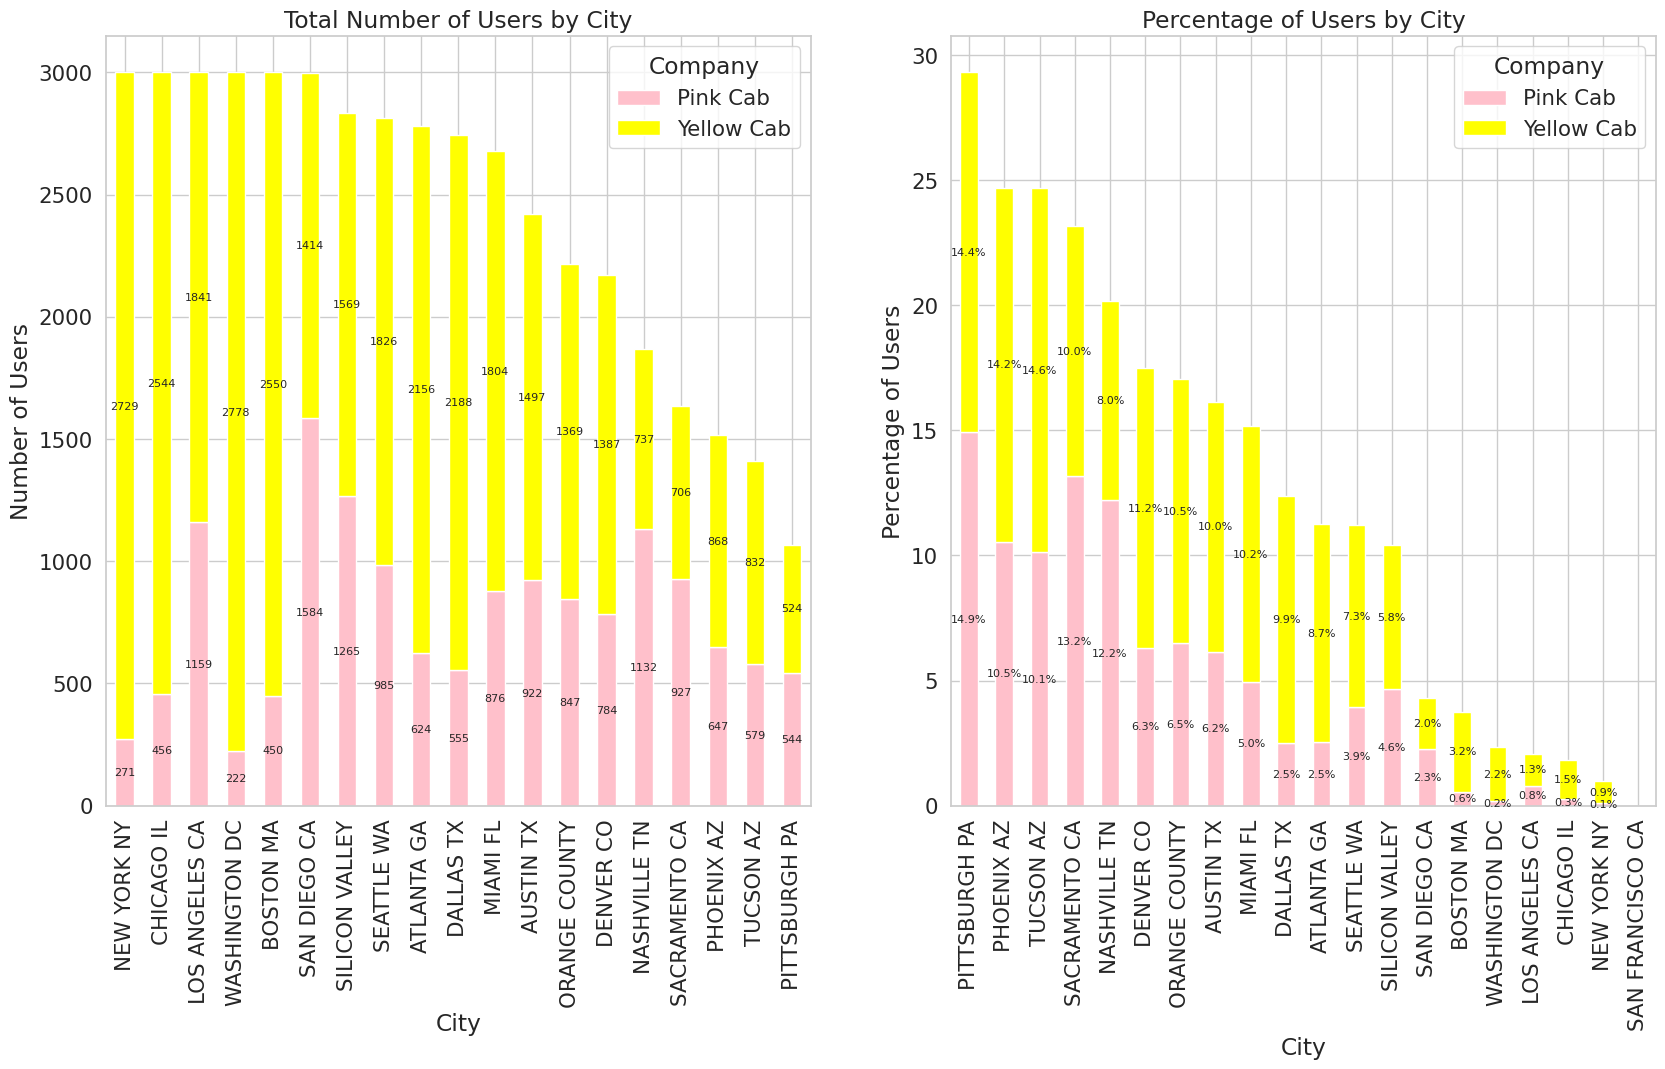

In [ ]:
# Remove duplicate users per year to ensure unique users per year
uniquecity_users = final_data.drop_duplicates(subset=['Customer ID', 'City'])

# Group by year and company and count unique users
user_counts_by_city = uniquecity_users.groupby(['City', 'Company'])['Customer ID'].nunique().unstack().fillna(0)

# Sort cities by total number of unique users in descending order
user_counts_by_city['Total'] = user_counts_by_city.sum(axis=1)
user_counts_by_city = user_counts_by_city.sort_values(by='Total', ascending=False).drop(columns='Total')

# Calculate total users in each city
total_users_by_city = city_data.set_index('City')['Users']
total_users_by_city = total_users_by_city.str.replace(',', '').astype(float)

# Calculate the percentage of unique users covered by each company in each city
user_percentage_by_city = (user_counts_by_city.T / total_users_by_city).T * 100

# Sort cities by the percentage of unique users in descending order
user_percentage_by_city['Total'] = user_percentage_by_city.sum(axis=1)
user_percentage_by_city = user_percentage_by_city.sort_values(by='Total', ascending=False).drop(columns='Total')

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot the total number of unique users by city
user_counts_by_city.plot(kind='bar', stacked=True, color=['pink', 'yellow'], ax=axes[0])
axes[0].set_title('Total Number of Users by City')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Number of Users')
axes[0].legend(loc='upper right', title='Company')

# Annotate each stacked bar with the count value
for bar in axes[0].patches:
    height = bar.get_height()
    if height > 0:
        axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{int(height)}', ha='center', va='center', fontsize=8)

# Plot the percentage of unique users by city
user_percentage_by_city.plot(kind='bar', stacked=True, color=['pink', 'yellow'], ax=axes[1])
axes[1].set_title('Percentage of Users by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Percentage of Users')
axes[1].legend(loc='upper right', title='Company')

# Annotate each stacked bar with the percentage value
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
        axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=8)

plt.show()

## Customer Retention

In [74]:
# Count rides per customer per company per year
ride_counts = final_data.groupby(['Company', 'Customer ID', 'Year']).size().reset_index(name='Ride Count')

# Define retention levels
def retention_level(x):
    if x >= 10:
        return 'Level 2'
    elif x >= 5:
        return 'Level 1'
    return None

ride_counts['Retention Level'] = ride_counts['Ride Count'].apply(retention_level)

# Filter out customers below Level 1 retention
retained_customers = ride_counts[ride_counts['Retention Level'].notna()]

# Count the number of customers at each retention level per company per year
retention_summary = retained_customers.groupby(['Company', 'Year', 'Retention Level'])['Customer ID'].nunique().unstack(fill_value=0)

retention_summary = retention_summary.stack().unstack('Retention Level')


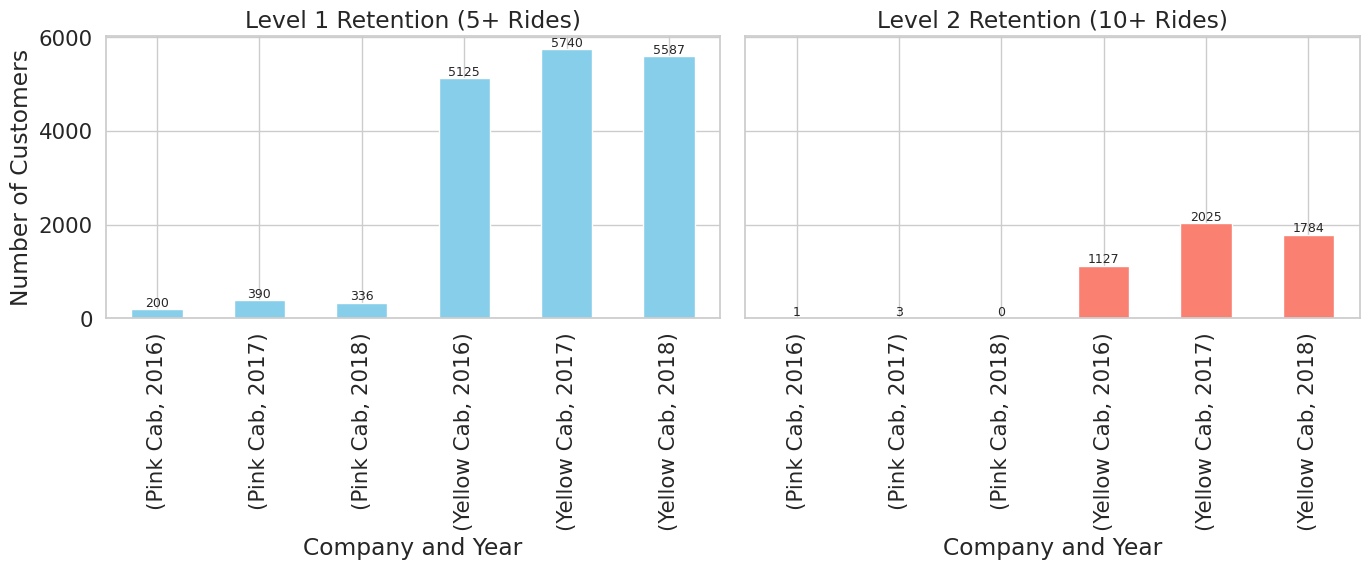

In [75]:
# Setup the subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Level 1 Retention Chart
retention_level_1 =  retention_summary['Level 1']
retention_level_1.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Level 1 Retention (5+ Rides)')
axes[0].set_xlabel('Company and Year')
axes[0].set_ylabel('Number of Customers')
axes[0].grid(True)

# Annotate Level 1 chart
for i, val in enumerate(retention_level_1.values.flatten()):
    axes[0].text(i, val, int(val), ha='center', va='bottom', fontsize=9)

# Level 2 Retention Chart
retention_level_2 = retention_summary['Level 2']
retention_level_2.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Level 2 Retention (10+ Rides)')
axes[1].set_xlabel('Company and Year')
axes[1].grid(True)

# Annotate Level 2 chart
for i, val in enumerate(retention_level_2.values.flatten()):
    axes[1].text(i, val, int(val), ha='center', va='bottom', fontsize=9)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Profit Analysis

## Annual Profit per Company

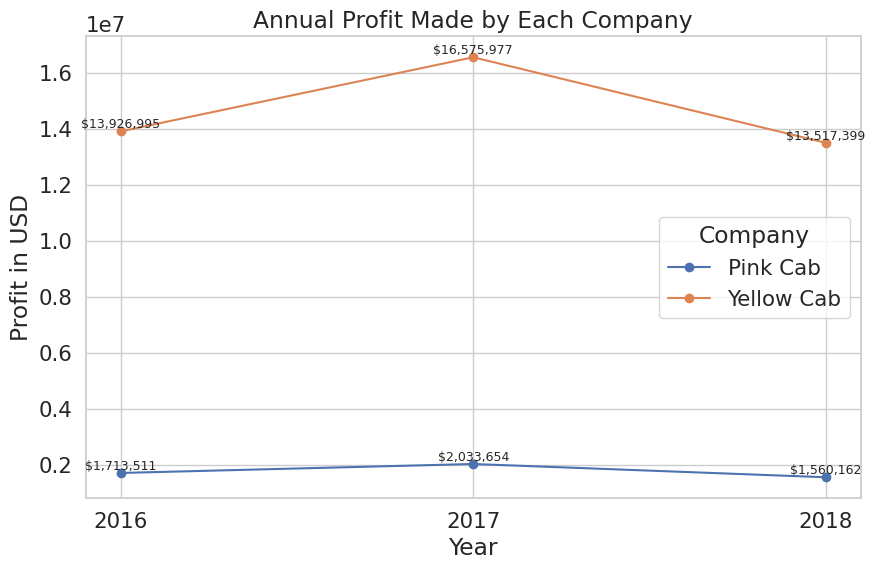

In [ ]:
# Calculate the profit for each transaction
final_data['Profit'] = final_data['Price Charged'] - final_data['Cost of Trip']

# Group by year and company and sum the profits
annual_profit = final_data.groupby(['Year', 'Company'])['Profit'].sum().unstack()

# Plotting the line chart
plt.figure(figsize=(10, 6))
for company in annual_profit.columns:
    plt.plot(annual_profit.index, annual_profit[company], marker='o', label=company)
    # Add annotations for each point
    for year, profit in annual_profit[company].items():
        plt.text(year, profit, f'${int(profit):,}', ha='center', va='bottom', fontsize=9)

plt.title('Annual Profit Made by Each Company')
plt.xlabel('Year')
plt.ylabel('Profit in USD')
plt.legend(loc='center right', title='Company')
plt.grid(True)
plt.xticks(annual_profit.index)  # Ensure all years are shown
plt.show()

## Revenue and Cost Analysis

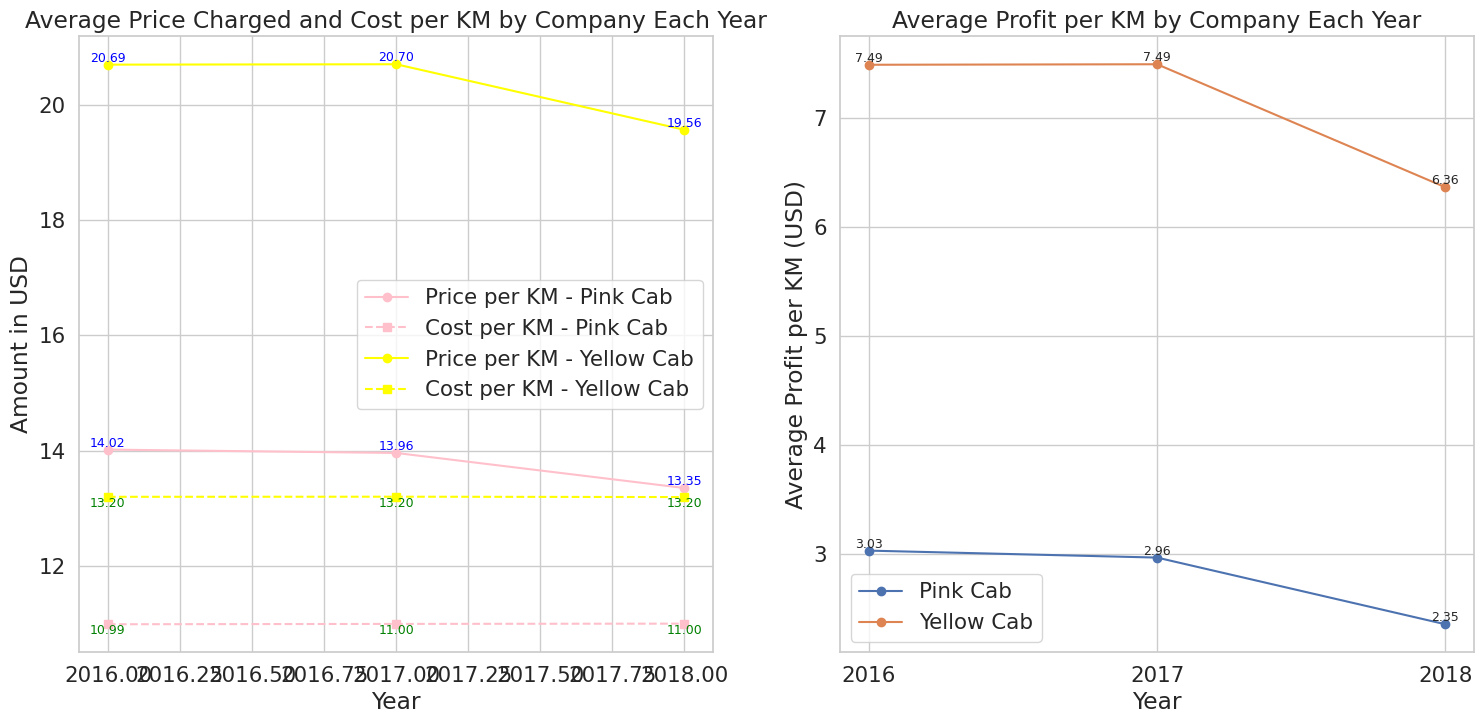

In [ ]:
# Calculate price per KM and cost per KM
final_data['Price per KM'] = final_data['Price Charged'] / final_data['KM Travelled']
final_data['Cost per KM'] = final_data['Cost of Trip'] / final_data['KM Travelled']

# Calculate profit per KM
final_data['Profit per KM'] = final_data['Profit'] / final_data['KM Travelled']

# Group by year and company to get the average price per KM and cost per KM
avg_metrics = final_data.groupby(['Company', 'Year']).agg({
    'Price per KM': 'mean',
    'Cost per KM': 'mean'
}).reset_index()

# Group by year and company to get the average profit per KM
avg_profit_per_km = final_data.groupby(['Year', 'Company'])['Profit per KM'].mean().unstack()

# Define colors for each company
colors = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'}

# Set the subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
#fig, ax = plt.subplots(figsize=(12, 8))

# Filtering data for each company and plotting
for company in avg_metrics['Company'].unique():
    company_data = avg_metrics[avg_metrics['Company'] == company]
    axes[0].plot(company_data['Year'], company_data['Price per KM'], marker='o', label=f'Price per KM - {company}', color=colors[company])
    axes[0].plot(company_data['Year'], company_data['Cost per KM'], marker='s', label=f'Cost per KM - {company}', color=colors[company], linestyle='--')
    # Adding annotations
    for idx, row in company_data.iterrows():
        axes[0].text(row['Year'], row['Price per KM'], f'{row["Price per KM"]:.2f}', color='blue', ha='center', va='bottom', fontsize=9)
        axes[0].text(row['Year'], row['Cost per KM'], f'{row["Cost per KM"]:.2f}', color='green', ha='center', va='top', fontsize=9)


axes[0].set_title('Average Price Charged and Cost per KM by Company Each Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Amount in USD')
axes[0].legend()
plt.grid(True)
plt.xticks(company_data['Year'].unique())  # Ensure all years are shown

# Plot data for each company
for company in avg_profit_per_km.columns:
    axes[1].plot(avg_profit_per_km.index, avg_profit_per_km[company], marker='o', label=company)

# Adding annotations for each point
for company in avg_profit_per_km.columns:
    for year in avg_profit_per_km.index:
        axes[1].text(year, avg_profit_per_km.at[year, company], f'{avg_profit_per_km.at[year, company]:.2f}',
                ha='center', va='bottom', fontsize=9)

axes[1].set_title('Average Profit per KM by Company Each Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Profit per KM (USD)')
axes[1].legend()
plt.grid(True)
plt.xticks(avg_profit_per_km.index)  # Ensure all years are shown

plt.show()

In [ ]:
avg_profit_per_km

Year,2016,2017,2018
Company,,,
Pink Cab,3.026813,2.962883,2.350447
Yellow Cab,7.489847,7.494612,6.364805


## Profit Contribution by User Attributes

### Gender Contribution

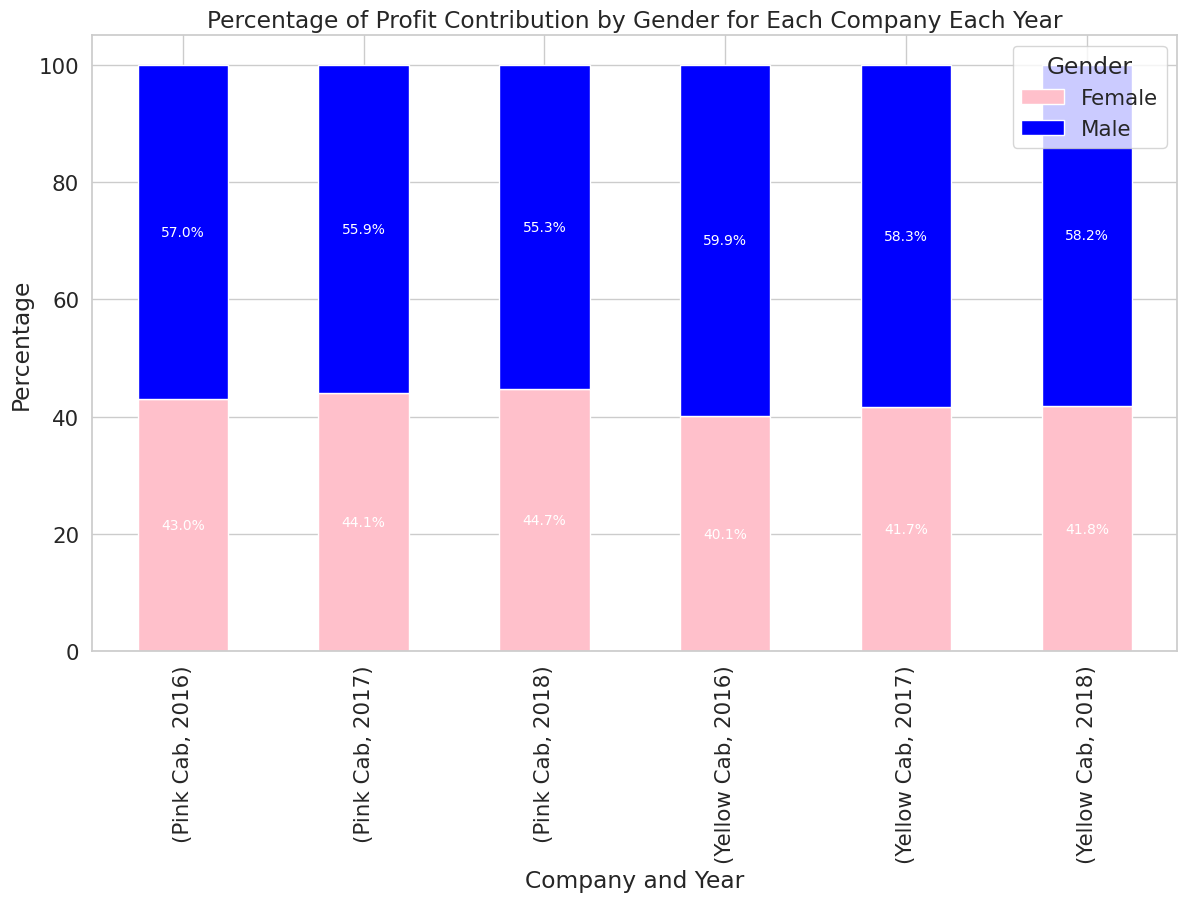

In [ ]:
# Group by company, year, and gender and sum the profits
profit_by_gender = final_data.groupby(['Company', 'Year', 'Gender'])['Profit'].sum().reset_index()

# Pivot the data to have companies and years as index, and genders as columns
pivot_table = profit_by_gender.pivot_table(index=['Company', 'Year'], columns='Gender', values='Profit', aggfunc='sum', fill_value=0)

# Calculate the percentage of profit contribution by gender
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
pivot_table_percentage.plot(kind='bar', stacked=True, ax=ax, color=['pink', 'blue'])

# Adding annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 0:  # Only annotate non-zero percentages
        ax.text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Setting titles and labels
ax.set_title('Percentage of Profit Contribution by Gender for Each Company Each Year')
ax.set_xlabel('Company and Year')
ax.set_ylabel('Percentage')
ax.legend(title='Gender')

plt.show()

### Age Contribution

In [ ]:
import numpy as np

# Define age groups
bins = [17, 25, 40, 60, np.inf]
labels = ['18-25', '26-40', '41-60', '61+']
final_data['Age Group'] = pd.cut(final_data['Age'], bins=bins, labels=labels)

# Remove duplicates for user count
uniqueage_users = final_data.drop_duplicates(subset=['Customer ID', 'Year', 'Company'])

# Group by company, year, and age group for user count
ageuser_counts = uniqueage_users.groupby(['Company', 'Year', 'Age Group'])['Customer ID'].size().unstack(fill_value=0)

# Normalize to get percentages of users
ageuser_percentages = ageuser_counts.div(ageuser_counts.sum(axis=1), axis=0) * 100

# Group by company, year, and age group for profit
profit_by_age_group = final_data.groupby(['Company', 'Year', 'Age Group'])['Profit'].sum().unstack(fill_value=0)

# Normalize to get profit percentages
ageprofit_percentages = profit_by_age_group.div(profit_by_age_group.sum(axis=1), axis=0) * 100

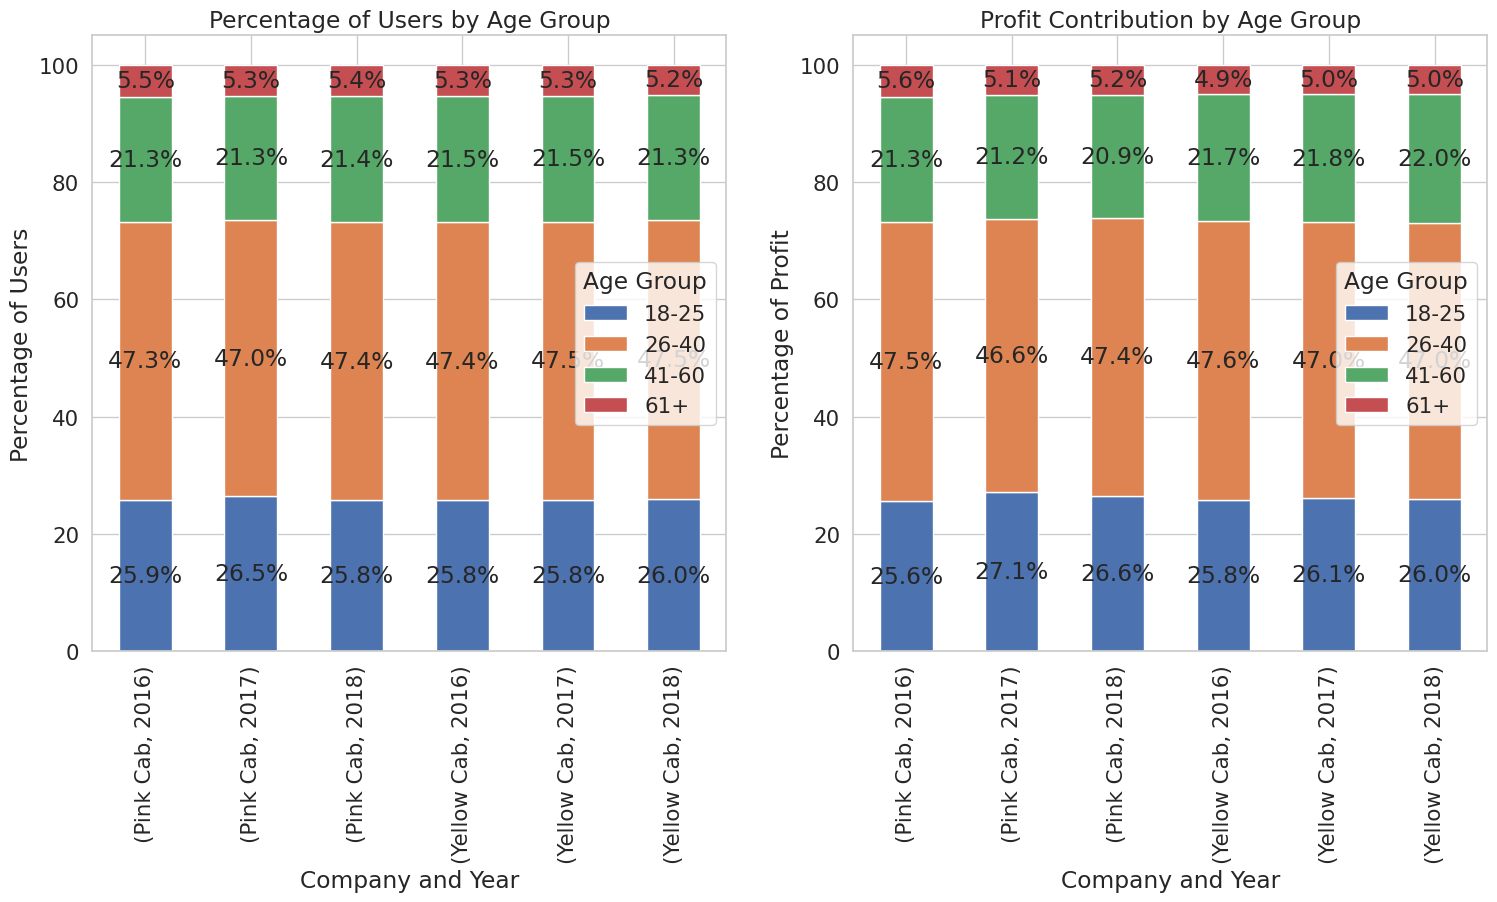

In [ ]:
# Setup the subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot percentage of users by age group
ageuser_percentages.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Percentage of Users by Age Group')
axes[0].set_ylabel('Percentage of Users')
axes[0].set_xlabel('Company and Year')
for c in axes[0].containers:
    axes[0].bar_label(c, label_type='center', fmt='%.1f%%')

# Plot profit percentages by age group
ageprofit_percentages.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Profit Contribution by Age Group')
axes[1].set_ylabel('Percentage of Profit')
axes[1].set_xlabel('Company and Year')
for c in axes[1].containers:
    axes[1].bar_label(c, label_type='center', fmt='%.1f%%')


plt.show()


### Income Level Contribution

In [ ]:
# Define age groups
income_bins = [0, 2500, 15000, np.inf]
income_labels = ['<2500', '2500-15000', '>15000']
final_data['Income Level'] = pd.cut(final_data['Income (USD/Month)'], bins=income_bins, labels=income_labels)

# Remove duplicates for user count
uniqueincome_users = final_data.drop_duplicates(subset=['Customer ID', 'Year', 'Company'])

# Group by company, year, and age group for user count
incomeuser_counts = uniqueincome_users.groupby(['Company', 'Year', 'Income Level'])['Customer ID'].size().unstack(fill_value=0)

# Normalize to get percentages of users
incomeuser_percentages = incomeuser_counts.div(incomeuser_counts.sum(axis=1), axis=0) * 100

# Group by company, year, and age group for profit
profit_by_income_level = final_data.groupby(['Company', 'Year', 'Income Level'])['Profit'].sum().unstack(fill_value=0)

# Normalize to get profit percentages
incomeprofit_percentages = profit_by_income_level.div(profit_by_income_level.sum(axis=1), axis=0) * 100

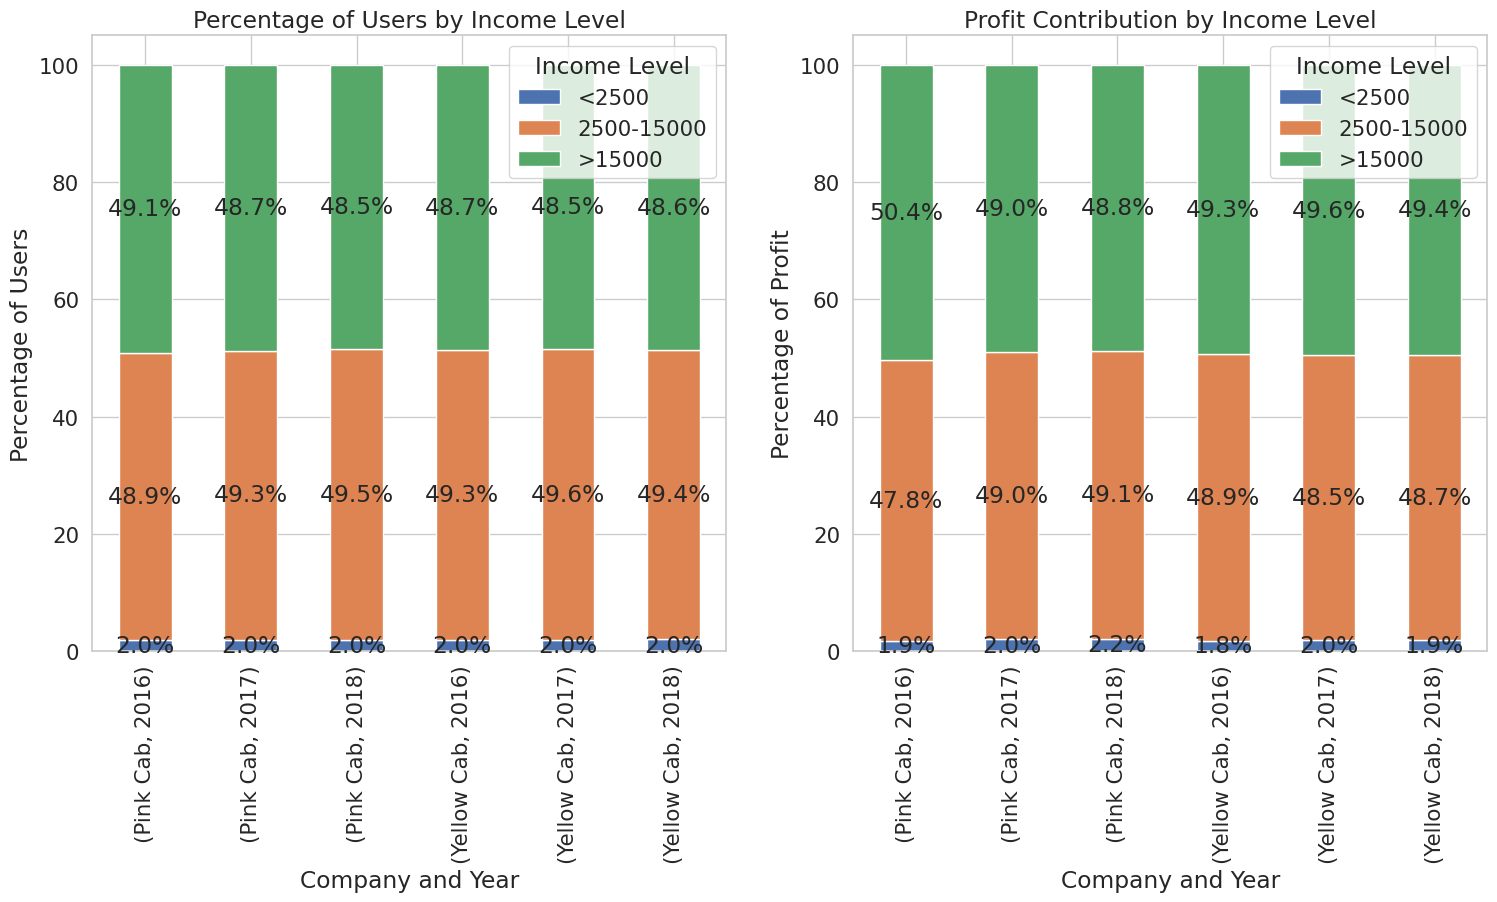

In [ ]:
# Setup the subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot percentage of users by age group
incomeuser_percentages.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Percentage of Users by Income Level')
axes[0].set_ylabel('Percentage of Users')
axes[0].set_xlabel('Company and Year')
for c in axes[0].containers:
    axes[0].bar_label(c, label_type='center', fmt='%.1f%%')

# Plot profit percentages by age group
incomeprofit_percentages.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Profit Contribution by Income Level')
axes[1].set_ylabel('Percentage of Profit')
axes[1].set_xlabel('Company and Year')
for c in axes[1].containers:
    axes[1].bar_label(c, label_type='center', fmt='%.1f%%')


plt.show()

### City Contribution

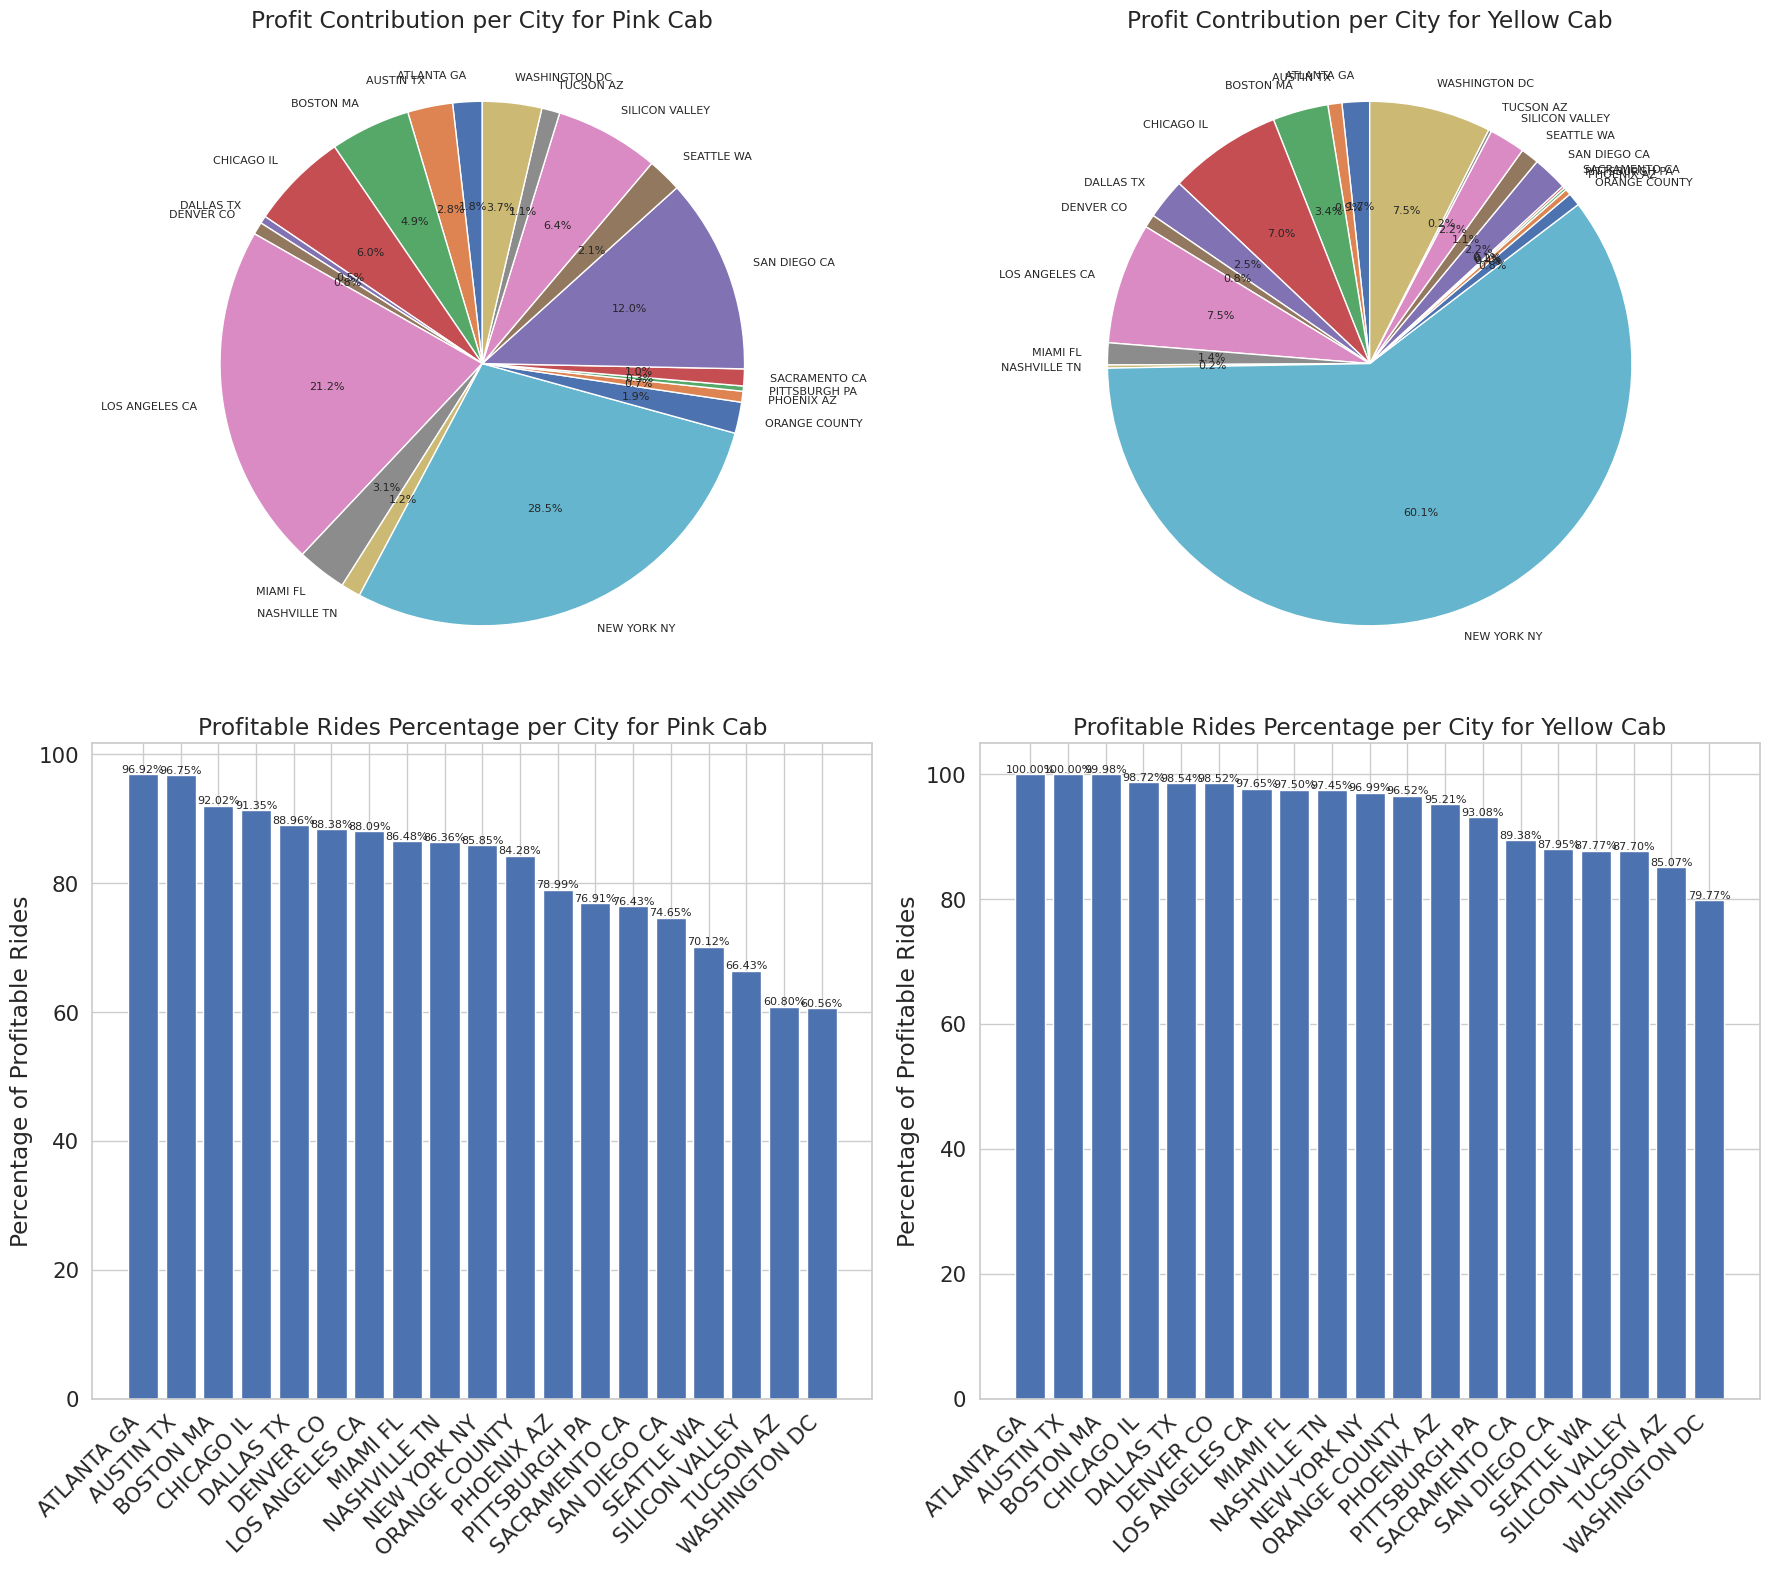

In [60]:
#profit made per city for each company

# Estimate profitable for each transaction
final_data['Profitable'] = final_data['Profit'] > 0

# Aggregate data for profit contribution per city for each company
profit_contribution = final_data.groupby(['Company', 'City'])['Profit'].sum().unstack()

# Calculate profitable rides percentage
profitable_rides_percentage = final_data.groupby(['Company', 'City'])['Profitable'].mean().unstack() * 100

# Setup the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# Pie charts for profit contribution per city for each company
for i, company in enumerate(profit_contribution.index):
    wedges, texts, autotexts = axes[0, i].pie(profit_contribution.loc[company], labels=profit_contribution.columns,
                                             autopct='%1.1f%%', startangle=90)
    axes[0, i].set_title(f'Profit Contribution per City for {company}')
    for text in texts:
        text.set_size(8)  # Smaller label size
    for autotext in autotexts:
        autotext.set_size(8)  # Smaller percentage label size

# Bar charts for profitable rides percentage per city for each company
for i, company in enumerate(profitable_rides_percentage.index):
    sorted_data = profitable_rides_percentage.loc[company].sort_values(ascending=False)  # Sort data for descending order
    bars = axes[1, i].bar(sorted_data.index, sorted_data)
    axes[1, i].set_title(f'Profitable Rides Percentage per City for {company}')
    axes[1, i].set_ylabel('Percentage of Profitable Rides')
    axes[1, i].set_xticklabels(profitable_rides_percentage.columns, rotation=45, ha="right")

    # Adding annotations on bar charts
    for bar in bars:
        yval = bar.get_height()
        axes[1, i].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize = 8)

plt.tight_layout()
plt.show()


## Profit Forecasting (2019-2021)

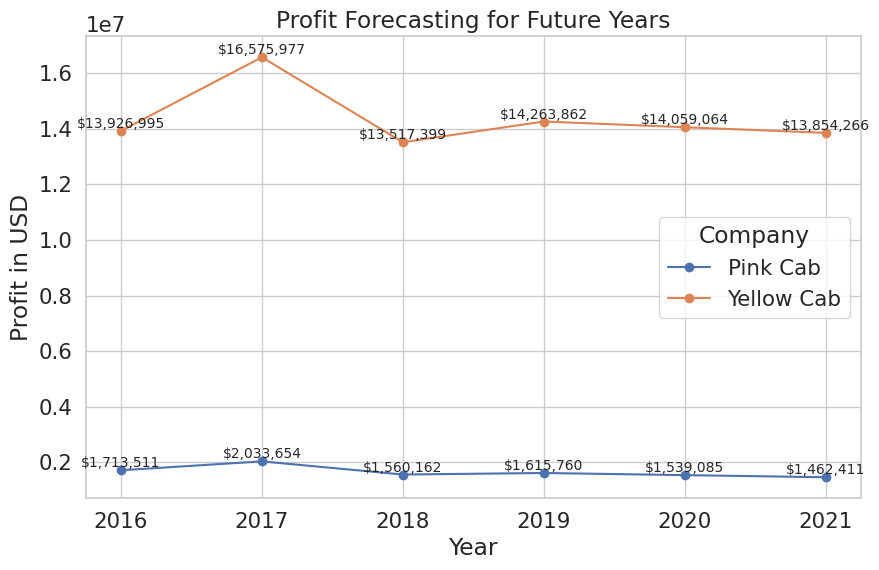

In [64]:
from sklearn.linear_model import LinearRegression

# Aggregate data for profit per year for each company
annual_profit = final_data.groupby(['Company', 'Year'])['Profit'].sum().unstack()

# Set years for prediction and fitting
current_years = np.array([2016, 2017, 2018]).reshape(-1, 1)
future_years = np.array([2019, 2020, 2021]).reshape(-1, 1)
years = np.concatenate((current_years, future_years)).flatten()

# Setup the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Forecast and plot for each company
for company in annual_profit.index:
    # Fit model on available years
    model = LinearRegression().fit(current_years, annual_profit.loc[company, current_years.flatten()])

    # Predict future years
    predicted_profits = model.predict(future_years)

    # Combine actual and predicted profits
    all_profits = np.concatenate((annual_profit.loc[company, current_years.flatten()], predicted_profits))

    # Plotting
    ax.plot(years, all_profits, marker='o', label=f'{company}')

    # Annotating all years
    for year, profit in zip(years, all_profits):
        ax.text(year, profit, f'${int(profit):,}', ha='center', va='bottom', fontsize=10)

ax.set_title('Profit Forecasting for Future Years')
ax.set_xlabel('Year')
ax.set_ylabel('Profit in USD')
ax.legend(title='Company')
plt.grid(True)
plt.xticks(years)  # Display all years
plt.show()


# Recomendations


**Demographics**: User demographics for yellow and pink company are very similar. Both companies' users have almost identical gender distribution, age distribution, and income level distribution. The main age group for both cab companies is 18-40, and the both are very popular in high and medium income class, indicating strong future development potential and steady revenue.


**User Reach**: Yellow cab company has 31,319 unique users while pink cab company has 14,829, about twice the amount of users. Yellow cab covers 2.4% of total cab users compared to pink cab's 1.1%, a significant larger market. Both companies users amount have faced a drop in users amount from 2017 to 2018, yellow cab decreased about 1.36% while pink cab decreased 1.61%.

**City Coverage**: Out of 19 cities, pink cab only reached more users, has higher user percentage in 3 cities, while yellow cab has more users in 16 others.



